In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

### Loading dataset

In [ ]:
from google.colab import files
data = files.upload()

Saving Loans_Dataset.csv to Loans_Dataset.csv


In [ ]:
df = pd.read_csv("/content/Loans_Dataset.csv")
df

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes
...,...,...,...,...,...,...
995,413,14914,523,4683,20533,No
996,359,14423,927,4838,20547,No
997,316,14872,613,4760,20561,No
998,305,14926,897,4572,20700,No


### Data Preprocessing

In [ ]:
df.shape

(1000, 6)

In [ ]:
df.isnull().sum()

,0
initial_payment,0
last_payment,0
credit_score,0
house_number,0
sum,0
result,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   initial_payment  1000 non-null   int64 
 1   last_payment     1000 non-null   int64 
 2   credit_score     1000 non-null   int64 
 3   house_number     1000 non-null   int64 
 4   sum              1000 non-null   int64 
 5   result           1000 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


In [ ]:
df.describe()

,initial_payment,last_payment,credit_score,house_number,sum
count,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000
mean,294.34300,12465.88400,528.042000,4027.011000,17315.280000
std,115.81539,1440.15617,259.796059,565.164179,1589.943875
min,100.00000,10005.00000,100.000000,3003.000000,13515.000000
25%,195.00000,11201.50000,302.000000,3545.000000,16073.750000
50%,289.50000,12450.00000,516.500000,4041.500000,17383.000000
75%,398.00000,13678.25000,753.500000,4507.000000,18595.250000
max,500.00000,14996.00000,997.000000,5000.000000,20737.000000


### Data Preparation

In [ ]:
x = df.loc[:, ['initial_payment', 'last_payment', 'credit_score', 'house_number']]
y = df.loc[:, ['result']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 42)

### Building model and predicting

In [ ]:
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [ ]:
y_pred = decision_tree.predict(x_test)
y_pred

array(['No', 'No', 'No', 'No', 'yes', 'No', 'No', 'No', 'No', 'yes', 'No',
       'yes', 'No', 'No', 'No', 'No', 'yes', 'No', 'No', 'yes', 'No',
       'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes',
       'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'yes',
       'yes', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'No', 'No',
       'yes', 'No', 'yes', 'No', 'No', 'No', 'No', 'yes', 'No', 'yes',
       'No', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'No', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'yes',
       'yes', 'yes', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'No',
       'yes', 'No', 'yes', 'No', 'No', 'yes', 'No', 'yes', 'No', 'No',
       'No', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'No', 'yes', 'No',
       'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'No', 'No',
       'No', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'yes', 'yes

### Model Evaluation

In [ ]:
print("Accuracy is "), accuracy_score(y_test,y_pred)*100

Accuracy is 


(None, 92.66666666666666)

### Visualizing Decision Tree

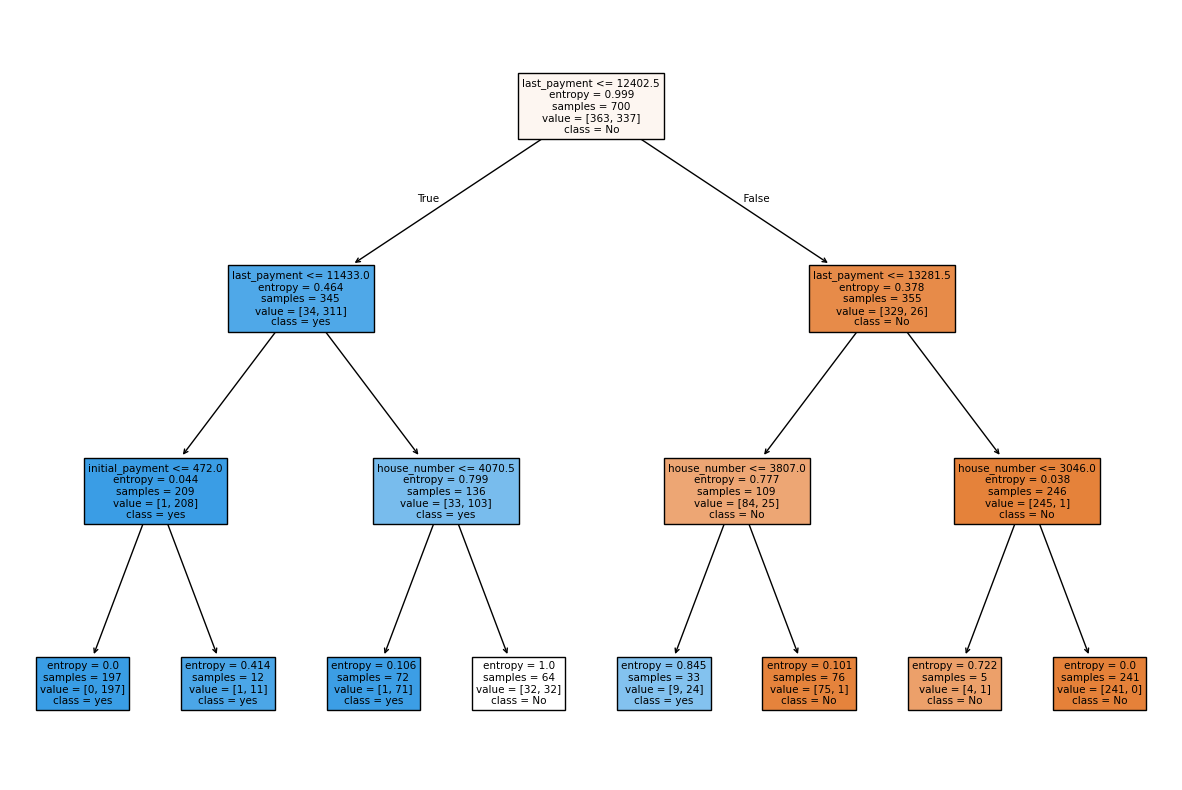

In [ ]:
fig = plt.figure(figsize=(15, 10))
tree_ = tree.plot_tree(decision_tree, feature_names = x.columns, class_names = decision_tree.classes_, filled = True)